Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

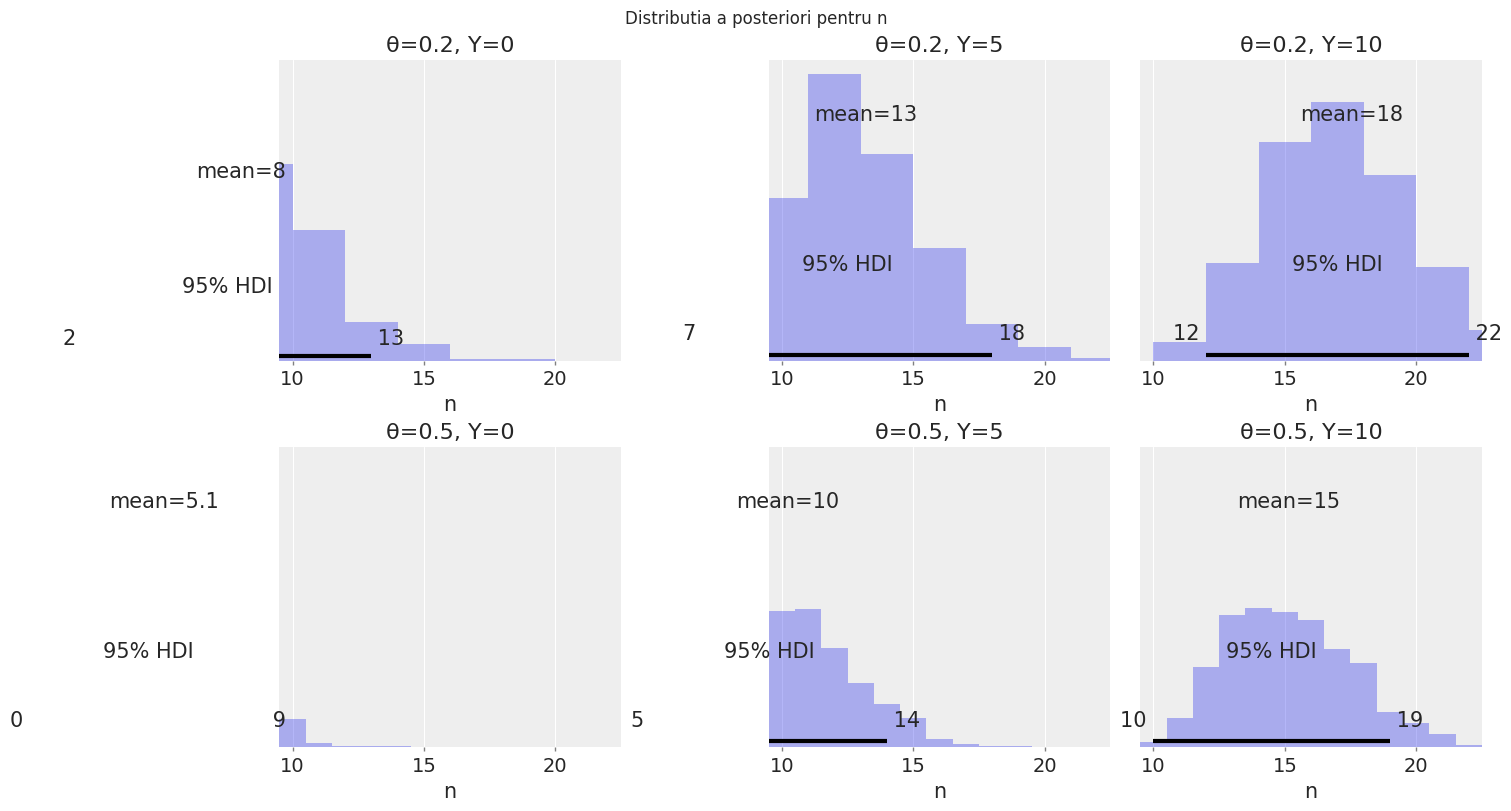

In [13]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

θ_val = [0.2, 0.5]
Y_val = [0, 5, 10]

fig, axes = plt.subplots(len(θ_val), len(Y_val), figsize=(15, 8), sharex=True, sharey=True)
fig.suptitle("Distributia a posteriori pentru n")

for i, teta in enumerate(θ_val):
    for j, Y in enumerate(Y_val):
        with pm.Model() as model:
            n = pm.Poisson("n", mu=10)

            Y_values = pm.Binomial("Y_values", n=n, p=teta, observed=Y)

            trace = pm.sample(1000, tune=1000, return_inferencedata=True)

        az.plot_posterior(trace, var_names=["n"], ax=axes[i, j], hdi_prob=0.95)
        axes[i, j].set_title(f"θ={teta}, Y={Y}")

for ax in axes.flat:
    ax.set_xlabel("n")
plt.show()